## SIR model (with deaths)
![](https://github.com/francescocicala/stochastic-modelling-playground/blob/master/images/sir.jpeg?raw=true)
Sketch by Prof. Bortolussi

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from evolve import evolve, show

# Derivatives definition
def S_dot_f(state, beta):
    return - beta * state[0] * state[1]

def I_dot_f(state, alpha, beta):
    return beta * state[0] * state[1] - alpha * state[1]

def R_dot_f(state, alpha, gamma):
    return gamma * alpha * state[1]

def N_dot_f(state, alpha, gamma):
    return - alpha * (1 - gamma) * state[1]

def deriv(state, t, alpha, beta, gamma):
    S_dot = S_dot_f(state, beta)
    I_dot = I_dot_f(state, alpha, beta)
    R_dot = R_dot_f(state, alpha, gamma)
    N_dot = N_dot_f(state, alpha, gamma)
    return np.asarray([S_dot, I_dot, R_dot, N_dot])

In [21]:
# Parameters
alpha = 0.010
beta = 0.004
gamma = 0.7
deriv_params = (alpha, beta, gamma) # same order as in the deriv function's arguments

# Initial conditions
N0 = 100
S0 = 95
I0 = 5
R0 = 0
state0 = np.asarray([S0, I0, R0, N0])

timelength = 1000
legend = ['susceptibles', 'infected', 'removed', 'total pop']

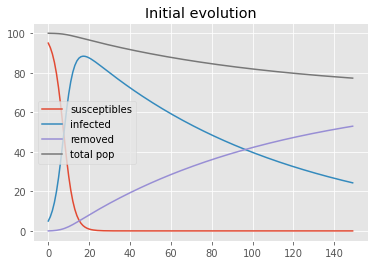

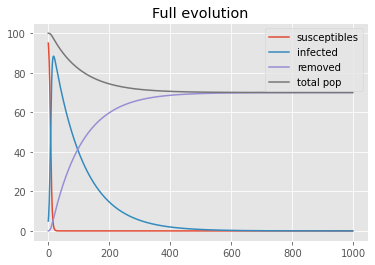

In [22]:
# evolve
history = evolve(deriv, state0, timelength, deriv_params)

# visualize
show(history, legend=legend, title='Initial evolution', last_t=150)
show(history, legend=legend, title='Full evolution')